In [37]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
from matplotlib import pyplot

from datetime import datetime

In [3]:
general=pd.read_csv('/Users/zzna/Documents/zzna/dev/git/mcube/data/localcurrency/general_currency_weekly.csv')
policy=pd.read_csv('/Users/zzna/Documents/zzna/dev/git/mcube/data/localcurrency/policy_currency_weekly.csv')

In [49]:
general['weekly_from_mon']=pd.to_datetime(general['weekly_from_mon'])
policy['weekly_from_mon']=pd.to_datetime(policy['weekly_from_mon'])
general

weekly_from_mon  가맹점업종명         결제상품명     결제총액  결제횟수
0          2019-03-25  유통업 영리        양주사랑카드     7600     1
1          2019-03-25  일반휴게음식        양주사랑카드    26200     2
2          2019-03-25  일반휴게음식        여주사랑카드    14000     1
3          2019-04-01    건축자재        양주사랑카드    16500     1
4          2019-04-01    건축자재        여주사랑카드     5000     1
...               ...     ...           ...      ...   ...
15874      2019-09-30   회원제형태       의정부사랑카드  2325100     8
15875      2019-09-30   회원제형태      이천사랑지역화폐  1030000     5
15876      2019-09-30   회원제형태  파주 Pay(파주페이)  1960500    11
15877      2019-09-30   회원제형태         하남하머니  2308300     7
15878      2019-09-30   회원제형태      행복화성지역화폐  7711500    21

[15879 rows x 5 columns]

In [ ]:
# 일반화폐 결제횟수는 정책화폐의  0.8755281308352727배
# 일반화폐 결제총액은 정책화폐의 1.0944087644571088배

In [34]:
print('일반화폐 총 결제횟수: ',general['결제횟수'].sum())
print('정책화폐 총 결제횟수: ',policy['결제횟수'].sum())
print('일반화폐 결제 총액: ', general['결제총액'].sum())
print('정책화폐 결제 총액: ', policy['결제총액'].sum())
print('일반화폐 평균: ',78403346978/2406277)
print('정책화폐 평균: ',71639911452/2748372)

일반화폐 총 결제횟수:  2406277
정책화폐 총 결제횟수:  2748372
일반화폐 결제 총액:  78403346978
정책화폐 결제 총액:  71639911452
일반화폐 평균:  32582.843528820664
정책화폐 평균:  26066.30814605883


In [35]:
print(general[['결제총액','결제횟수']].describe())
print(policy[['결제총액','결제횟수']].describe())

               결제총액          결제횟수
count  1.587900e+04  15879.000000
mean   4.937549e+06    151.538321
std    1.665975e+07    599.817223
min    1.000000e+01      1.000000
25%    1.000000e+05      3.000000
50%    5.389000e+05     12.000000
75%    2.562050e+06     54.000000
max    3.125581e+08  11805.000000
               결제총액          결제횟수
count  1.771100e+04  17711.000000
mean   4.044939e+06    155.178815
std    1.419129e+07    622.021815
min    3.200000e+01      1.000000
25%    1.150000e+05      3.000000
50%    5.200000e+05     10.000000
75%    2.270655e+06     51.000000
max    3.386623e+08  12710.000000


Text(0, 0.5, '결제횟수')

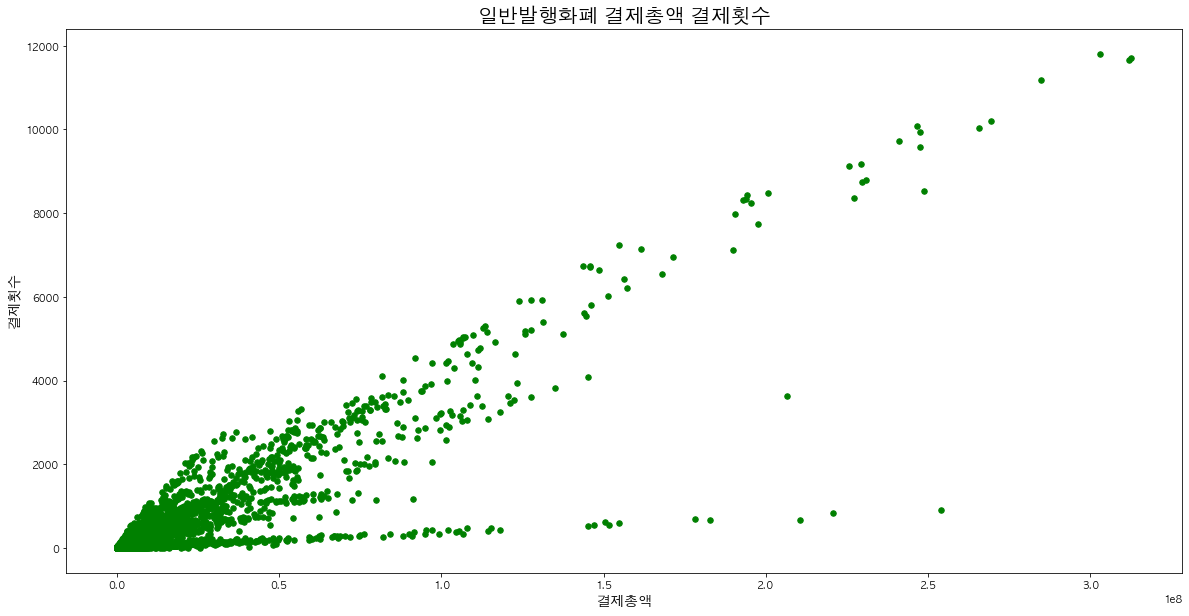

In [56]:
general[['결제총액','결제횟수']].plot(kind='scatter', figsize=(20,10), \
                             x='결제총액', y='결제횟수', s=30, c='green')

plt.title('일반발행화폐 결제총액 결제횟수', fontsize=20)
plt.xlabel('결제총액', fontsize=14)
plt.ylabel('결제횟수', fontsize=14)

Text(0, 0.5, '결제횟수')

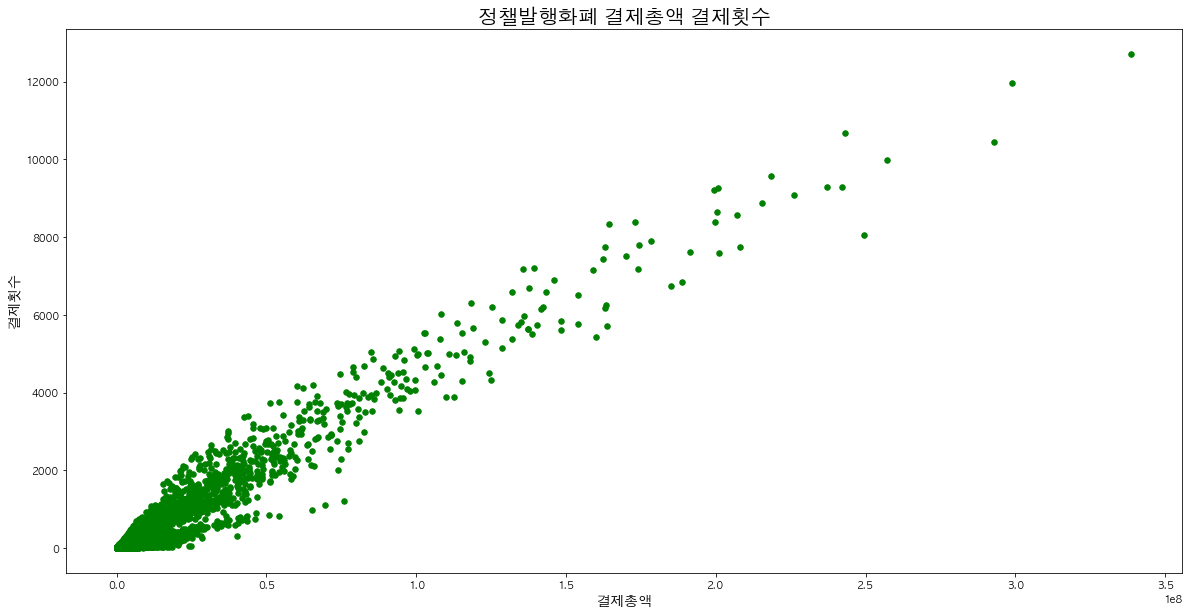

In [60]:
policy[['결제총액','결제횟수']].plot(kind='scatter', figsize=(20,10), \
                             x='결제총액', y='결제횟수', s=30, c='green')

plt.title('정챌발행화폐 결제총액 결제횟수', fontsize=20)
plt.xlabel('결제총액', fontsize=14)
plt.ylabel('결제횟수', fontsize=14)

In [93]:
policy.head()

weekly_from_mon 가맹점업종명       결제상품명    결제총액  결제횟수
0      2019-03-25   건강식품  양주사랑카드(정책)  800000     1
1      2019-03-25   레저업소  양주사랑카드(정책)  683500     9
2      2019-03-25   레져용품  양주사랑카드(정책)  300000     1
3      2019-03-25  문화.취미  양주사랑카드(정책)   19100     1
4      2019-03-25   보건위생  안성사랑카드(정책)   30000     1

In [95]:
general['평균결제액']=general.iloc[:,3] / general.iloc[:,4]
policy['평균결제액']=policy.iloc[:,3] / policy.iloc[:,4]

In [96]:
policy.head()

weekly_from_mon 가맹점업종명       결제상품명    결제총액  결제횟수          평균결제액
0      2019-03-25   건강식품  양주사랑카드(정책)  800000     1  800000.000000
1      2019-03-25   레저업소  양주사랑카드(정책)  683500     9   75944.444444
2      2019-03-25   레져용품  양주사랑카드(정책)  300000     1  300000.000000
3      2019-03-25  문화.취미  양주사랑카드(정책)   19100     1   19100.000000
4      2019-03-25   보건위생  안성사랑카드(정책)   30000     1   30000.000000

Text(0.5, 1.0, '일반지역화폐별 결제총액')

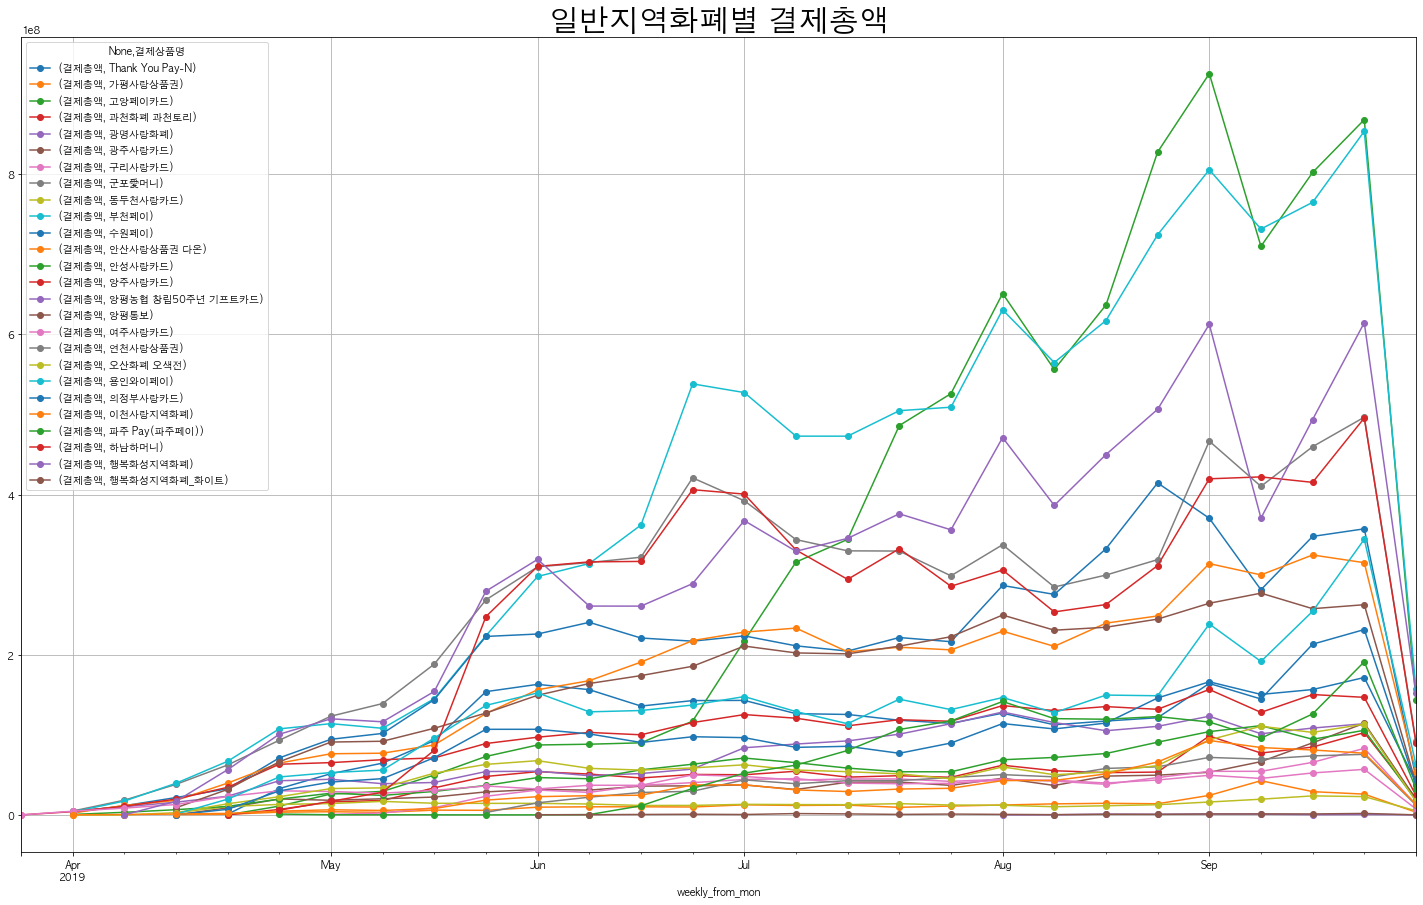

In [85]:
general.pivot_table(values=['결제총액'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,15), grid=True, marker='o')
plt.title('일반지역화폐별 결제총액', fontsize=30)


Text(0.5, 1.0, '정책지역화폐별 결제총액')

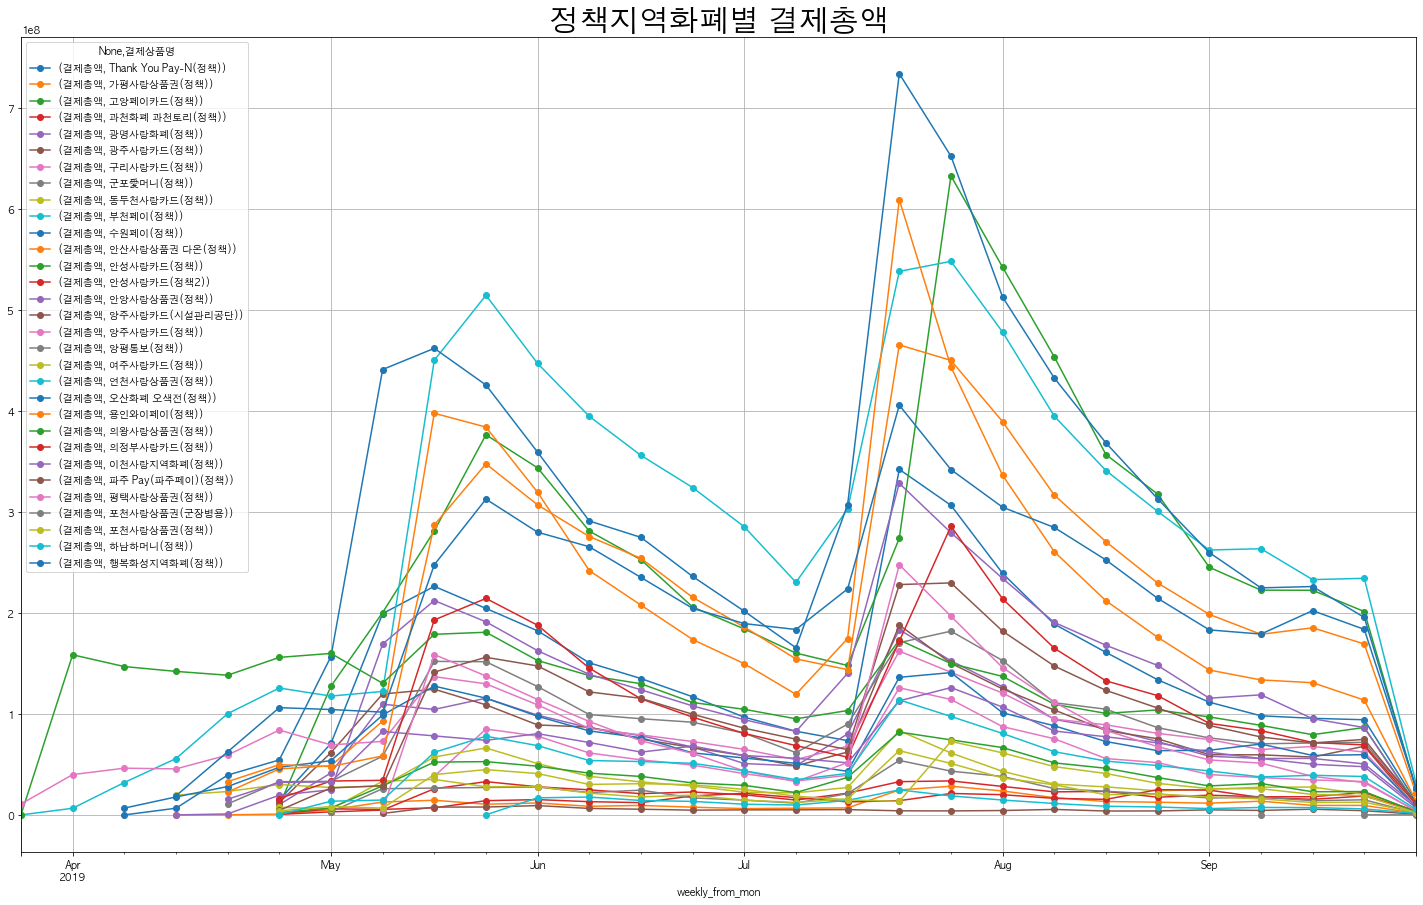

In [102]:
policy.pivot_table(values=['결제총액'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,15), grid=True, marker='o')
plt.title('정책지역화폐별 결제총액', fontsize=30)

Text(0.5, 1.0, '일반지역화폐별 평균결제액')

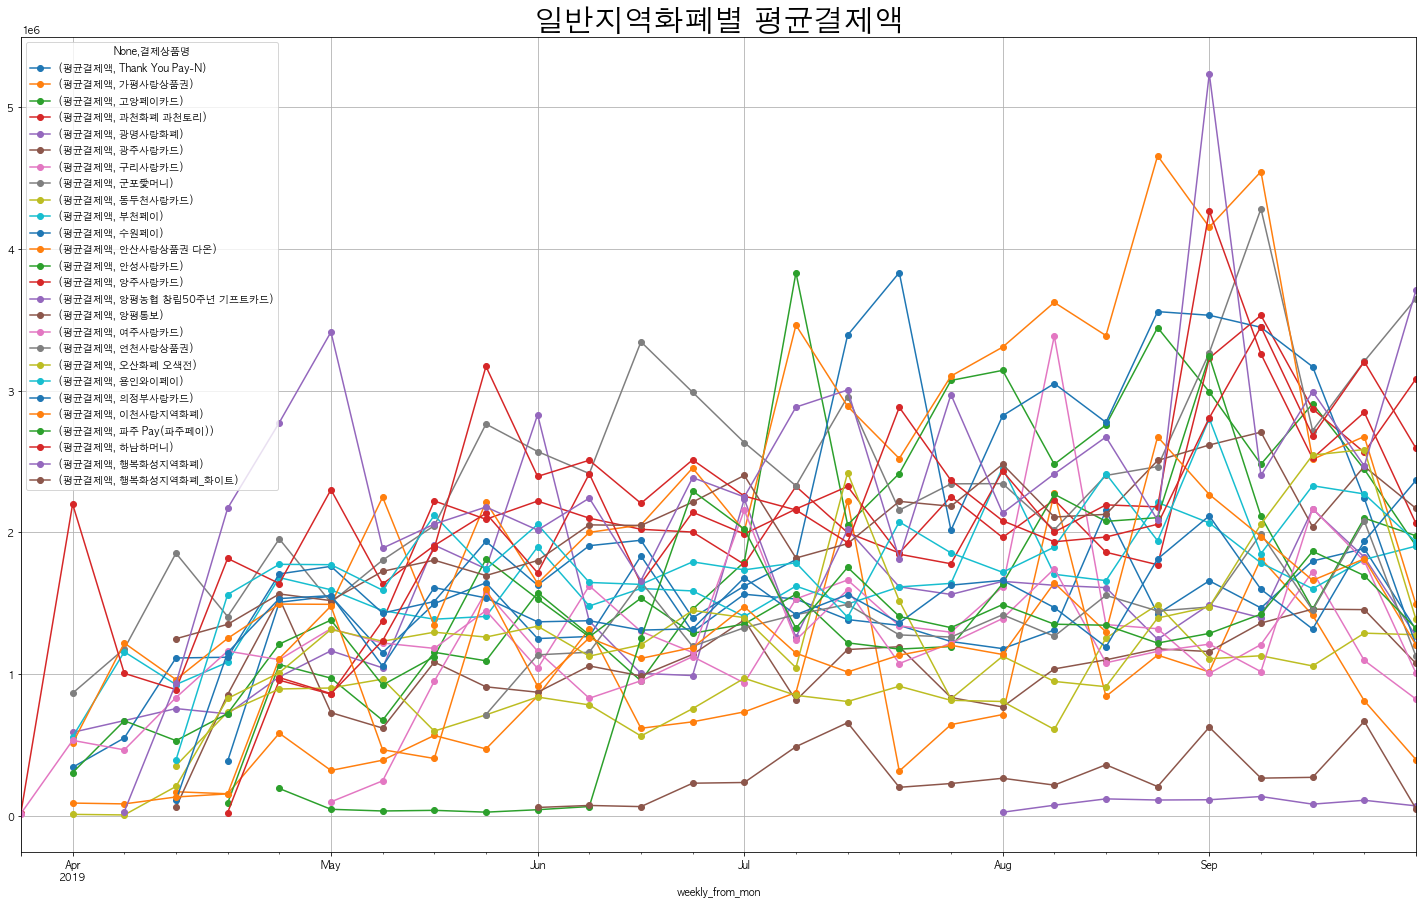

In [104]:
general.pivot_table(values=['평균결제액'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,15), grid=True, marker='o')
plt.title('일반지역화폐별 평균결제액', fontsize=30)

Text(0.5, 1.0, '정책지역화폐별 평균결제액')

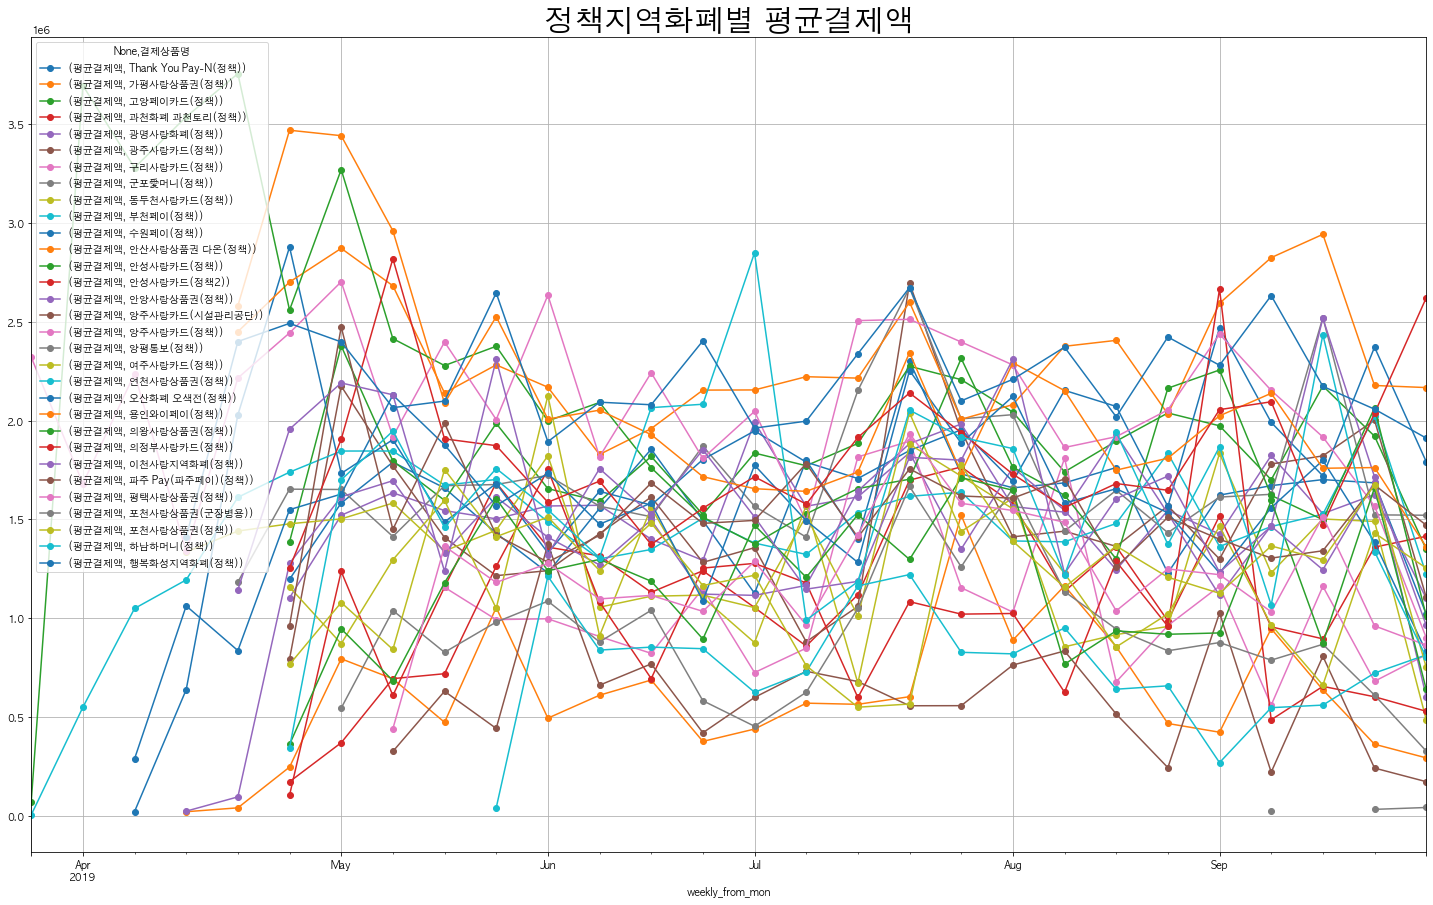

In [105]:
policy.pivot_table(values=['평균결제액'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,15), grid=True, marker='o')
plt.title('정책지역화폐별 평균결제액', fontsize=30)

Text(0.5, 1.0, '일반지역화폐별 결제횟수')

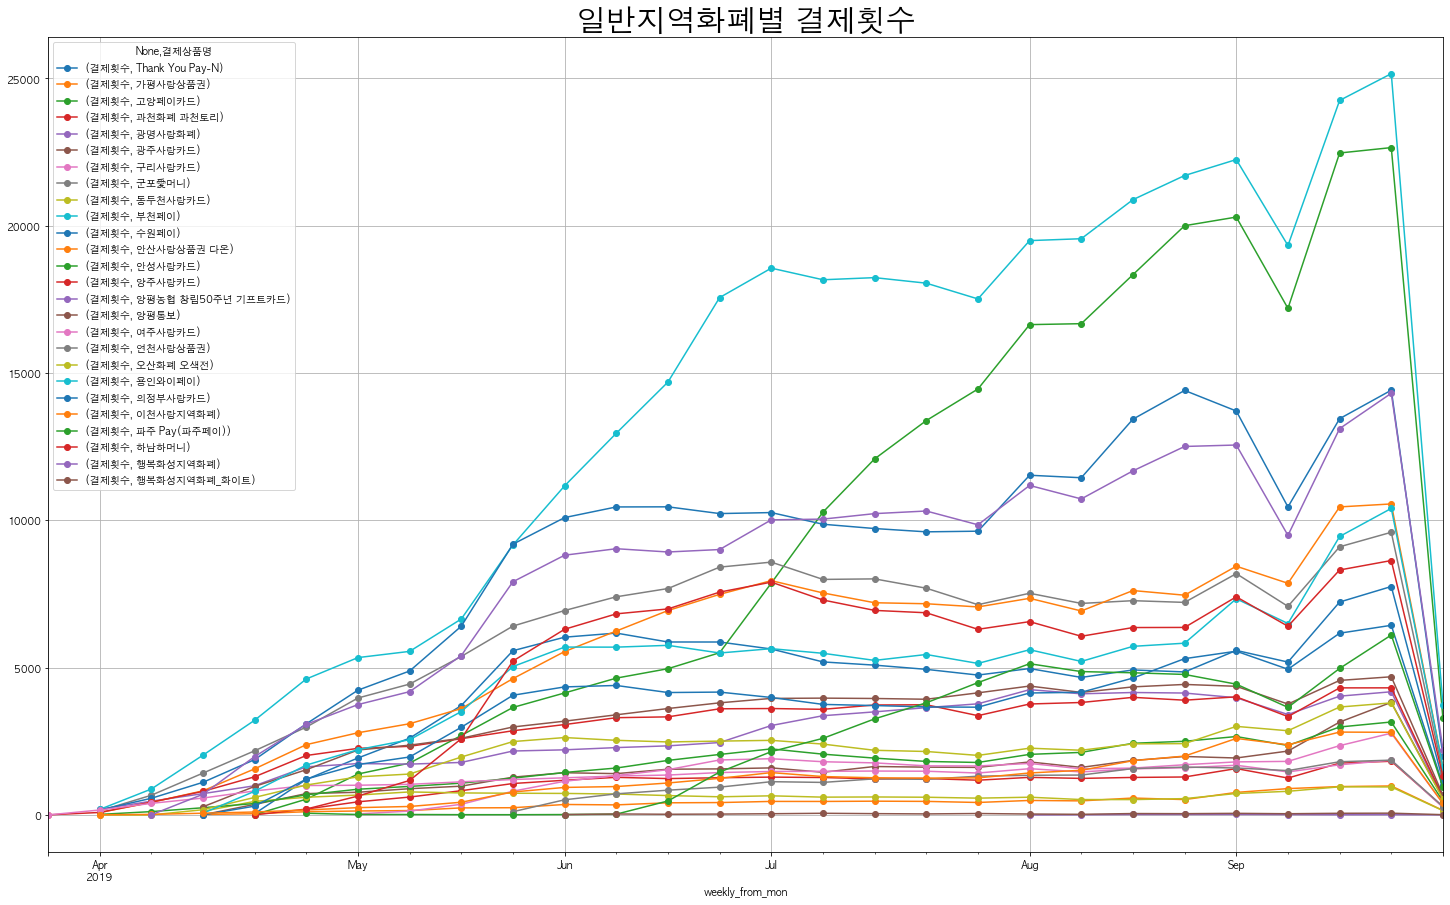

In [106]:
general.pivot_table(values=['결제횟수'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,15), grid=True, marker='o')
plt.title('일반지역화폐별 결제횟수', fontsize=30)

Text(0.5, 1.0, '정책지역화폐별 결제횟수')

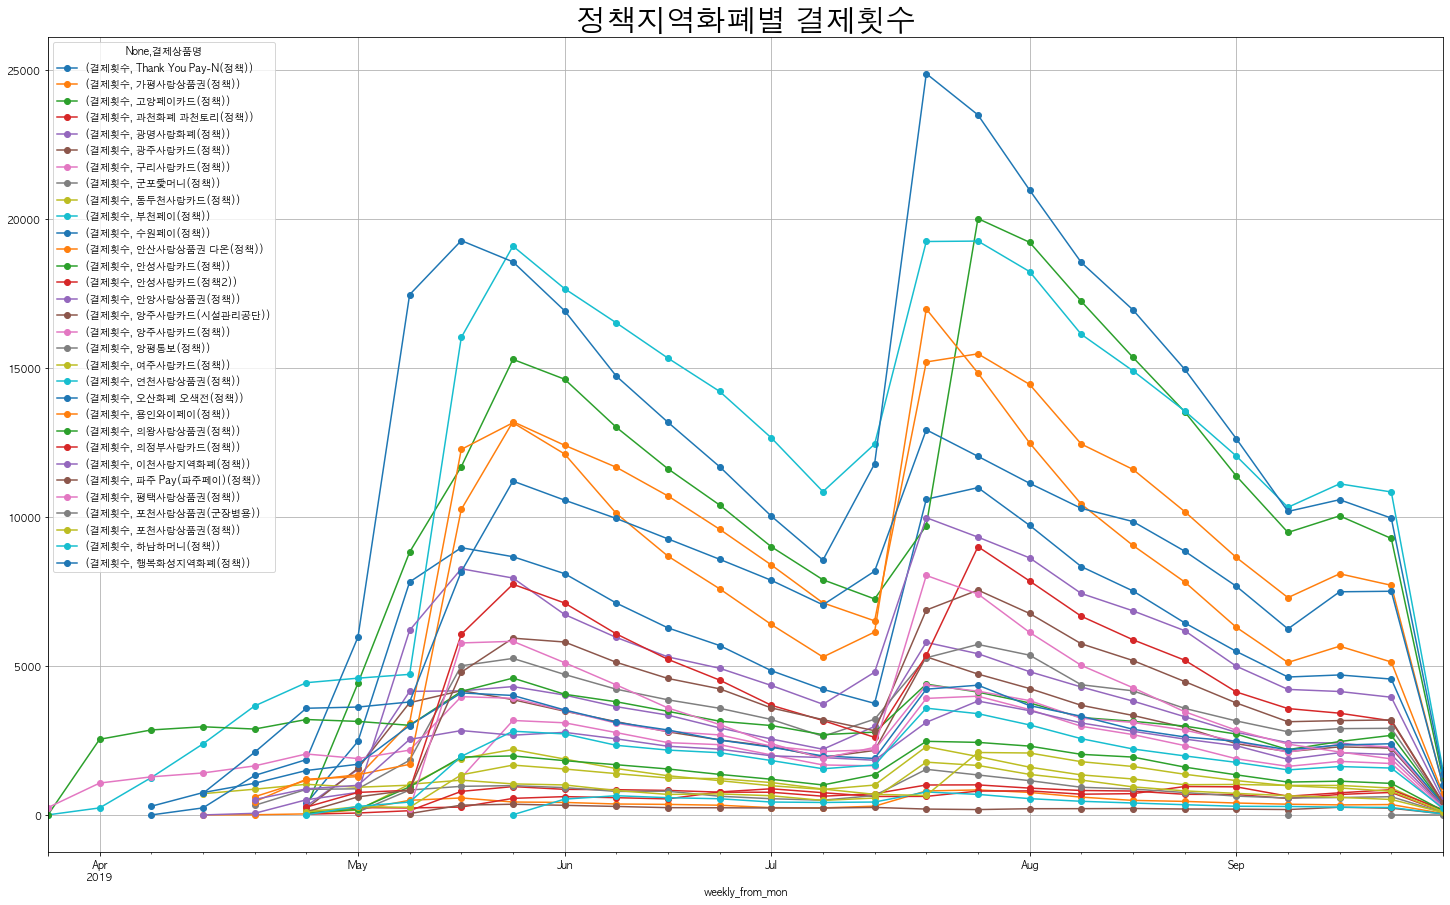

In [107]:
policy.pivot_table(values=['결제횟수'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,15), grid=True, marker='o')
plt.title('정책지역화폐별 결제횟수', fontsize=30)

Text(0.5, 1.0, '업종별 일반지역화폐 결제총액')

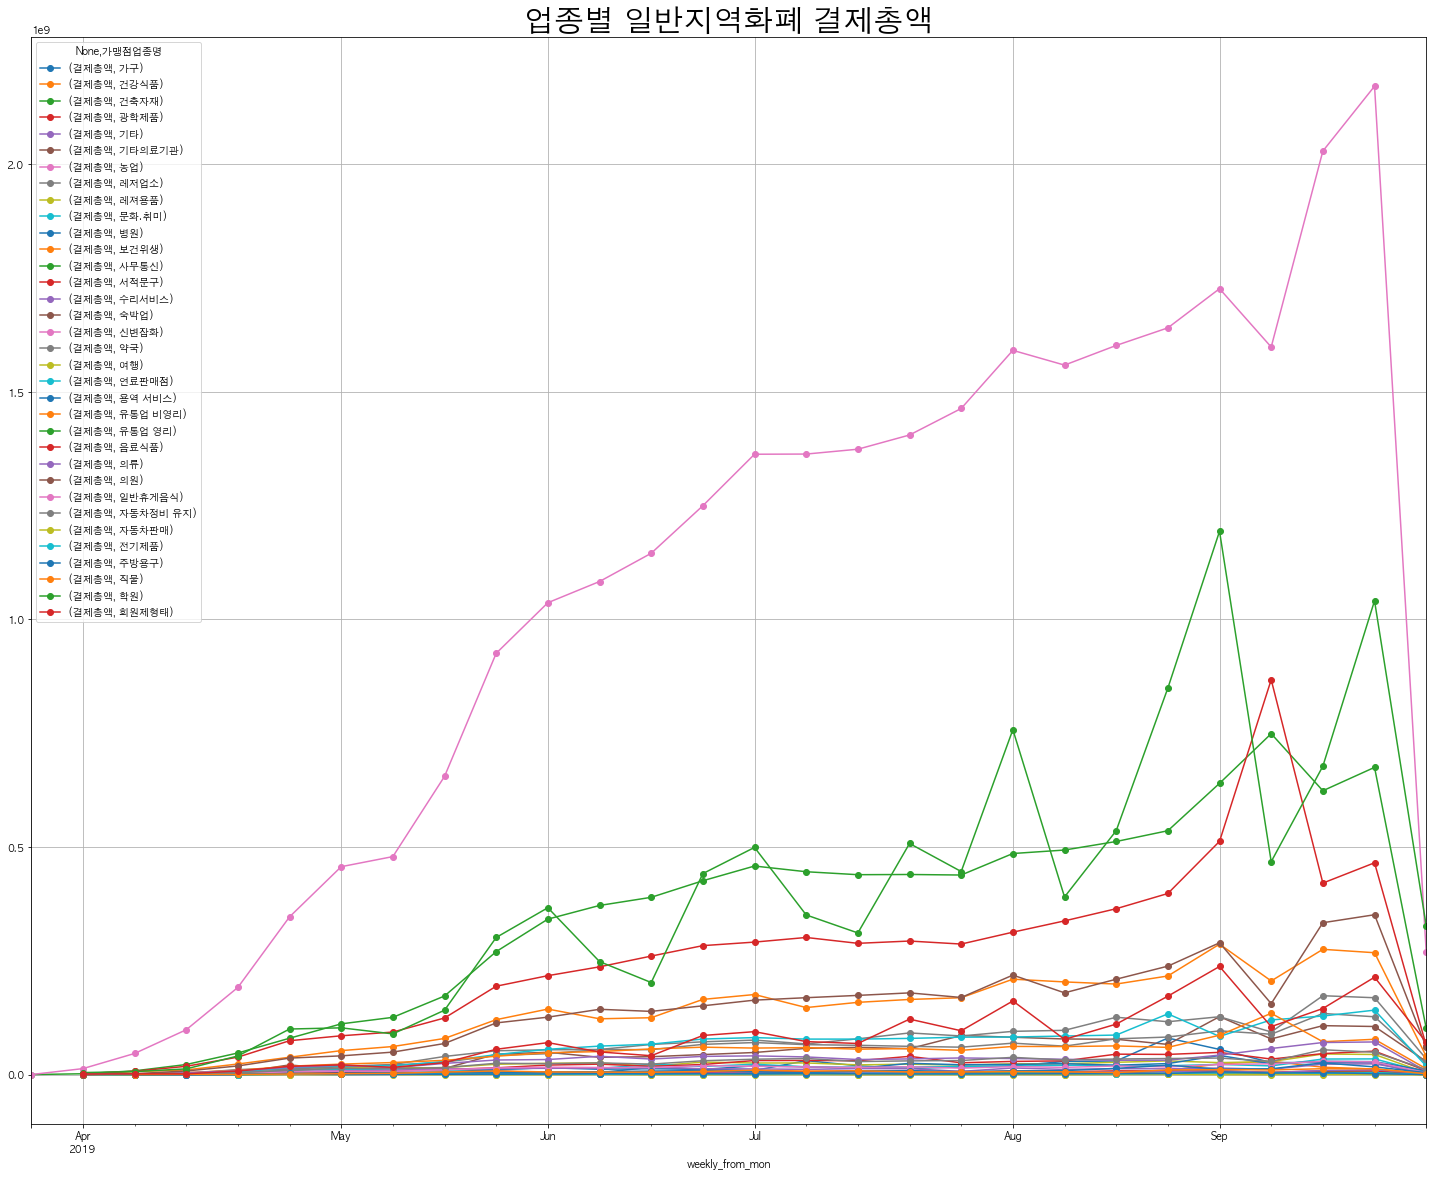

In [109]:
general.pivot_table(values=['결제총액'], \
                    columns=['가맹점업종명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,20), grid=True, marker='o')
plt.title('업종별 일반지역화폐 결제총액', fontsize=30)

Text(0.5, 1.0, '업종별 정책지역화폐 결제총액')

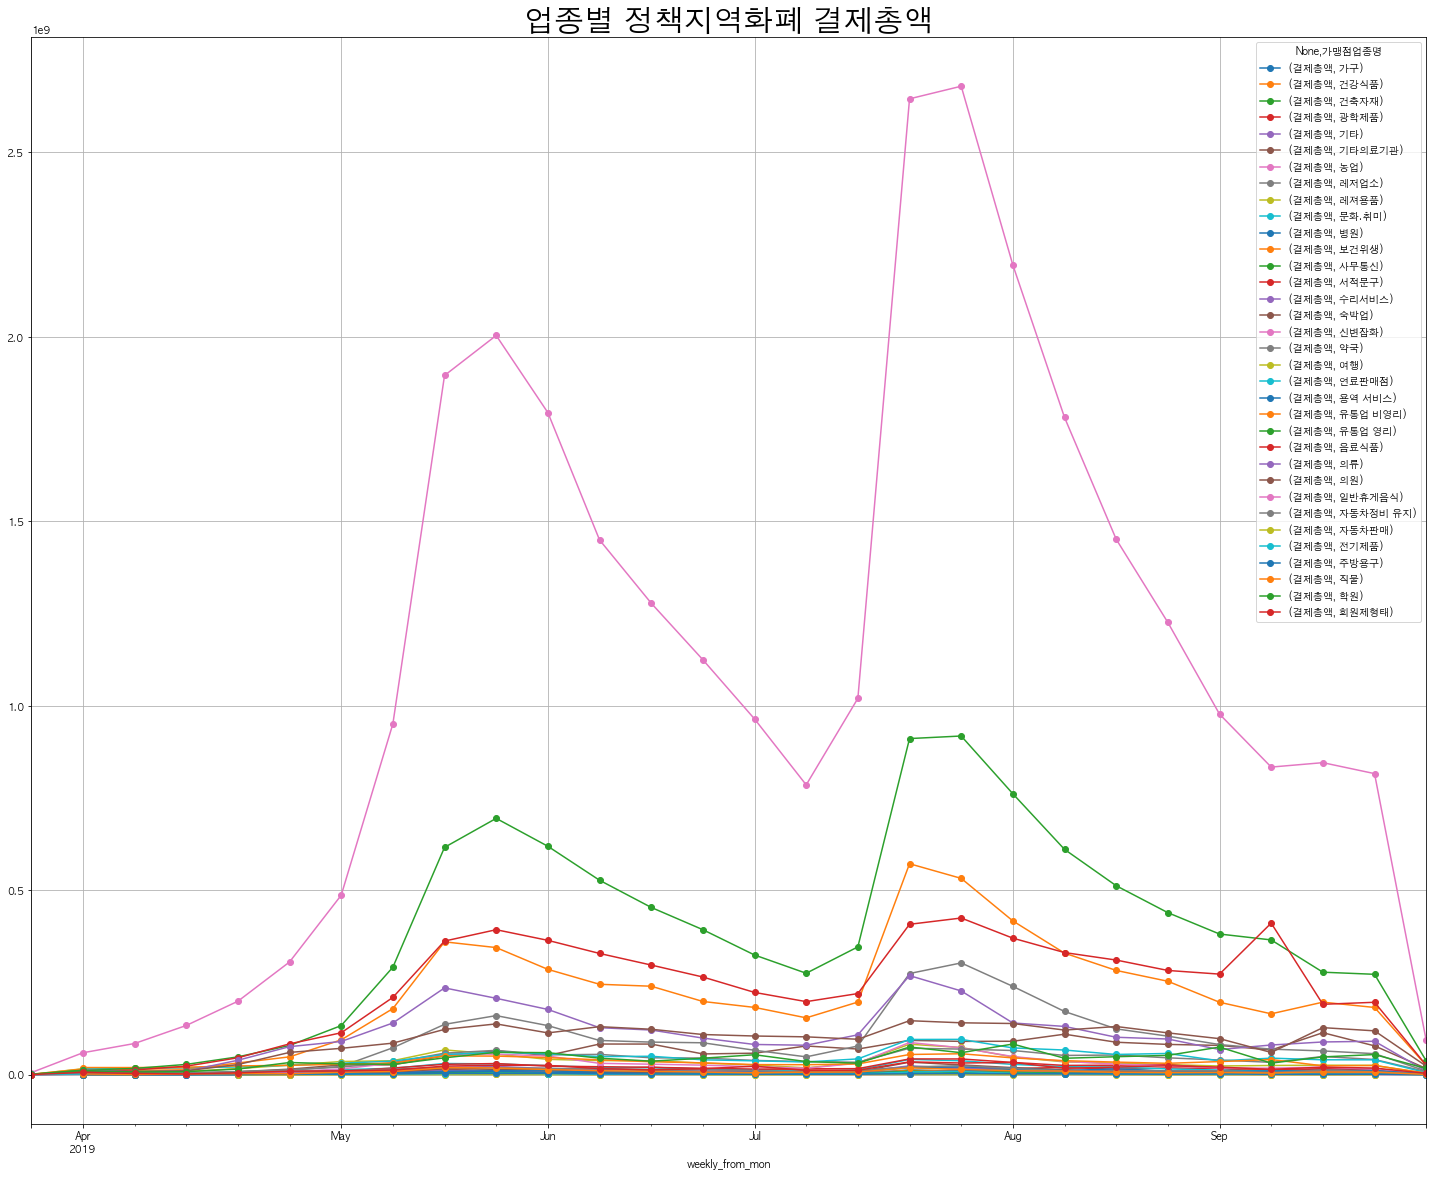

In [111]:
policy.pivot_table(values=['결제총액'], \
                    columns=['가맹점업종명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,20), grid=True, marker='o')
plt.title('업종별 정책지역화폐 결제총액', fontsize=30)

Text(0.5, 1.0, '업종별 일반지역화폐 결제횟수')

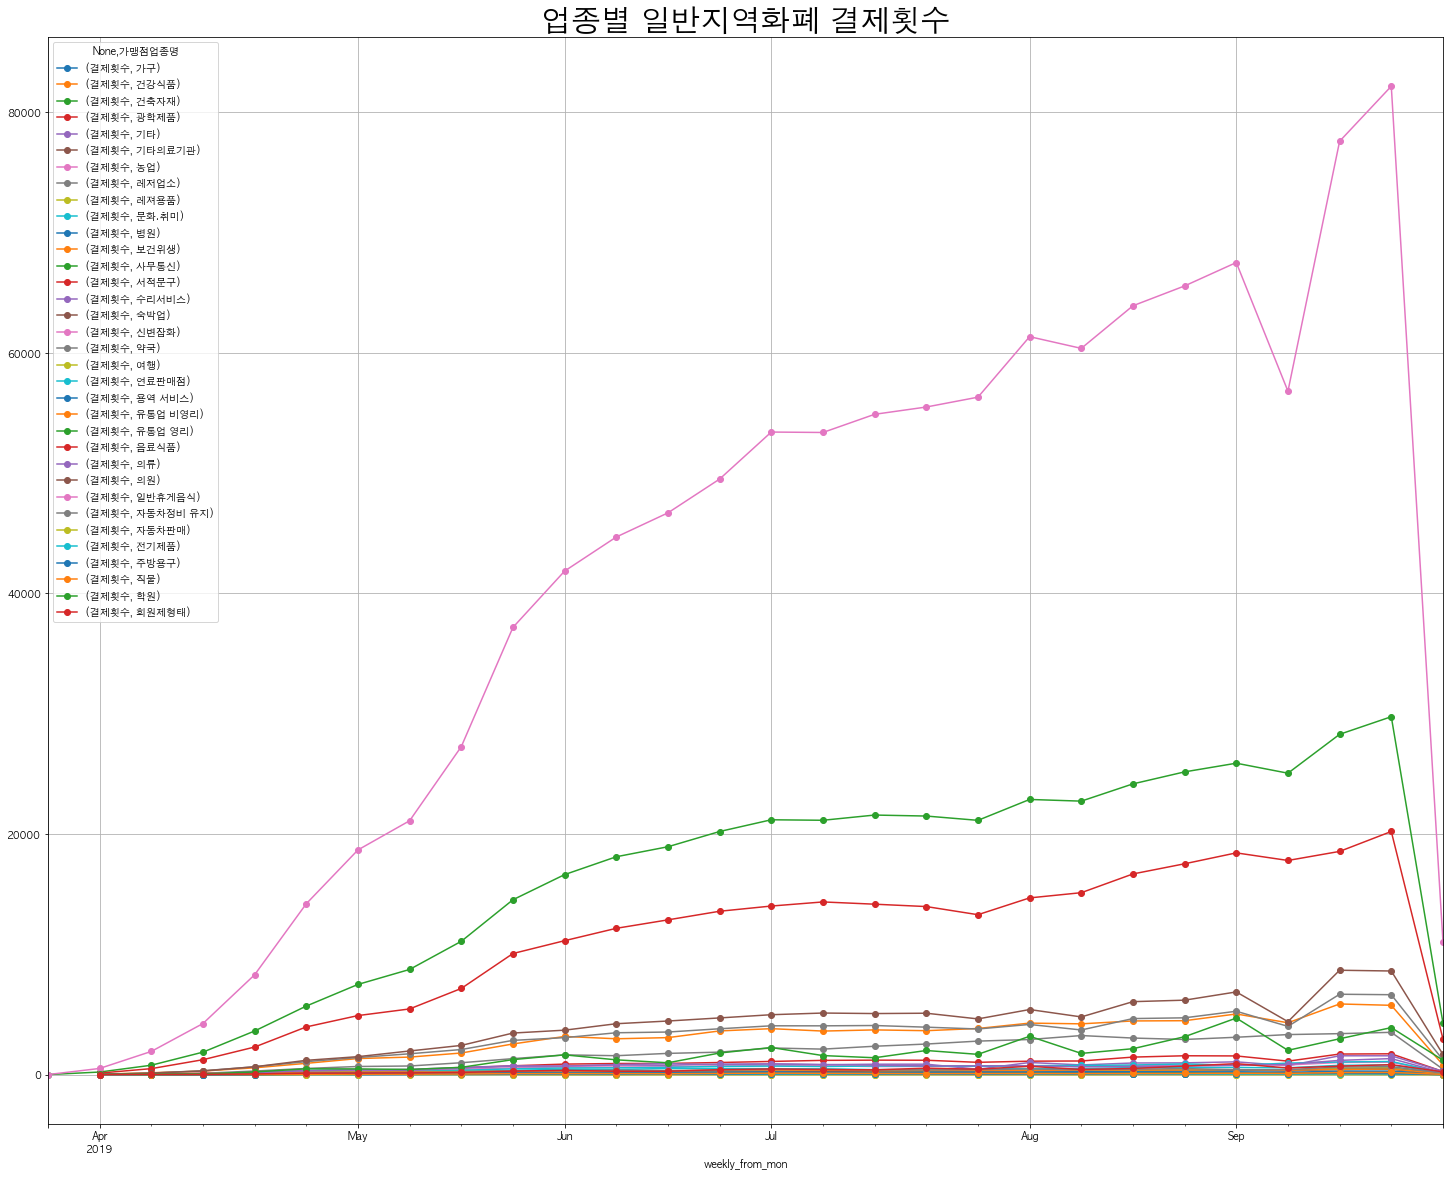

In [112]:
general.pivot_table(values=['결제횟수'], \
                    columns=['가맹점업종명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,20), grid=True, marker='o')
plt.title('업종별 일반지역화폐 결제횟수', fontsize=30)

Text(0.5, 1.0, '업종별 정책지역화폐 결제횟수')

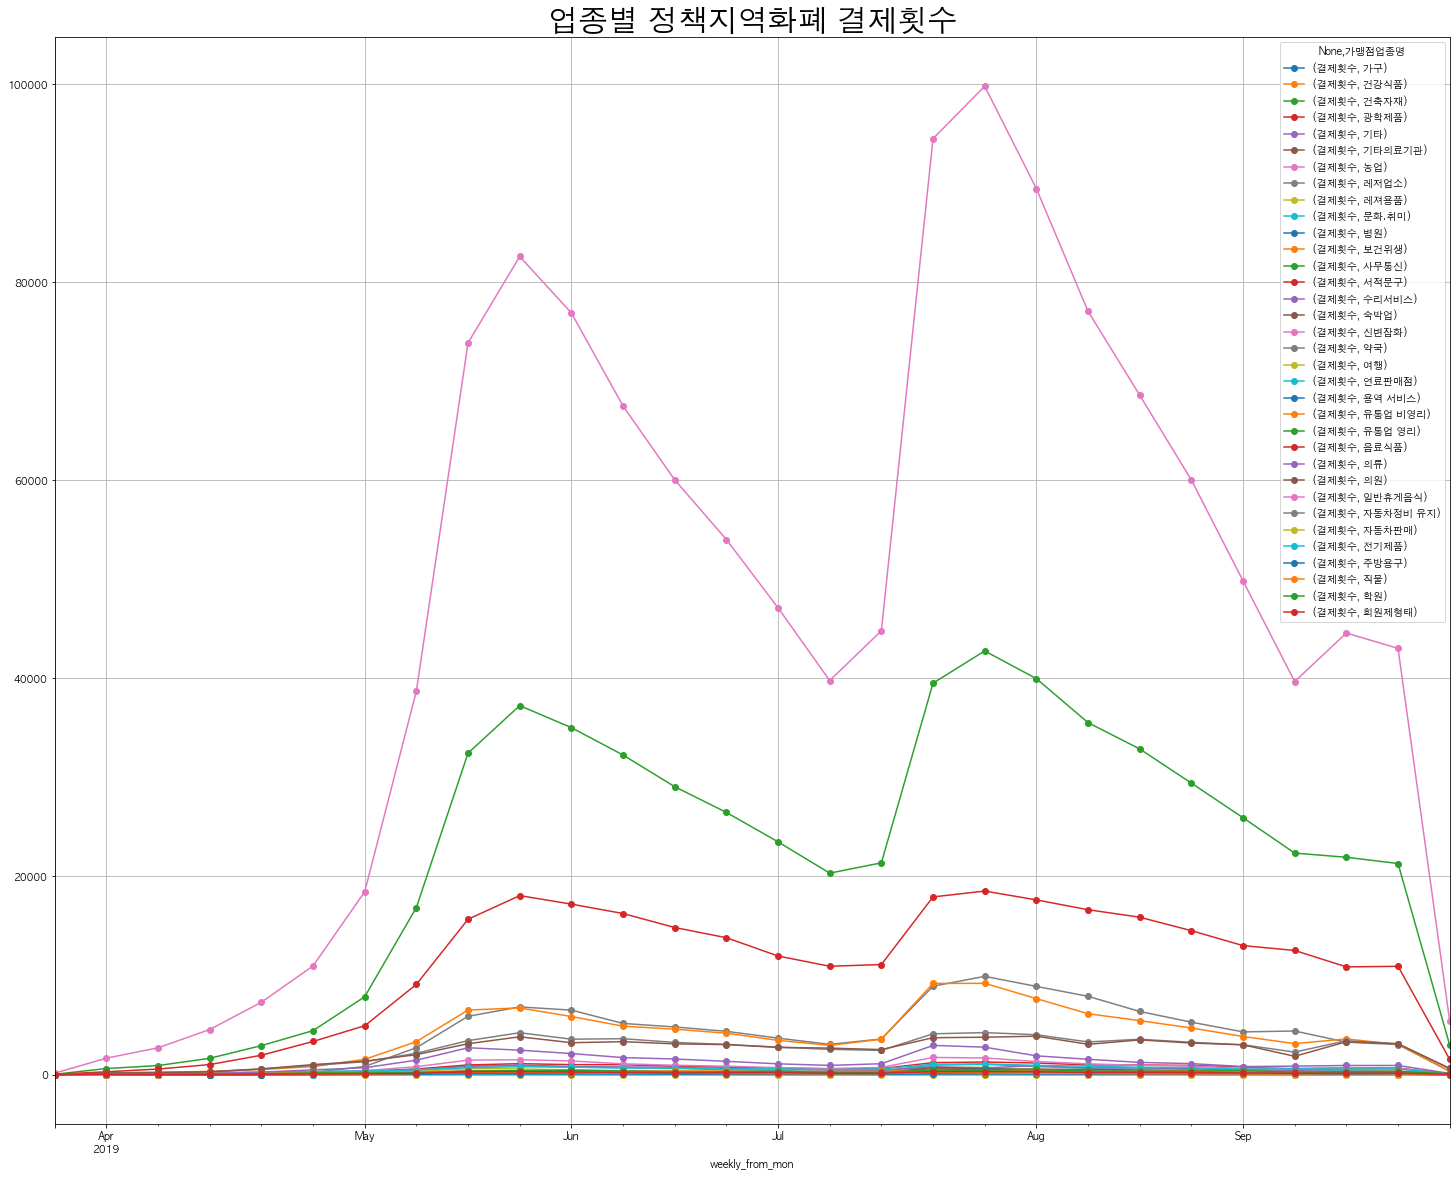

In [113]:
policy.pivot_table(values=['결제횟수'], \
                    columns=['가맹점업종명'], \
                    index=['weekly_from_mon'], aggfunc='sum'). \
plot(figsize=(25,20), grid=True, marker='o')
plt.title('업종별 정책지역화폐 결제횟수', fontsize=30)

In [129]:
gc_weekly_locally_sum=general.pivot_table(values=['결제총액'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum')
gc_weekly_locally_sum.fillna(0, inplace=True)
gc_weekly_locally_sum

결제총액                                        \
결제상품명           Thank You Pay-N     가평사랑상품권       고양페이카드    과천화폐 과천토리   
weekly_from_mon                                                         
2019-03-25                  0.0         0.0          0.0          0.0   
2019-04-01                  0.0         0.0          0.0          0.0   
2019-04-08                  0.0         0.0          0.0          0.0   
2019-04-15                  0.0    441150.0          0.0          0.0   
2019-04-22             908820.0    896750.0     135800.0      60300.0   
2019-04-29           32874038.0   3441094.0   11018710.0    6868830.0   
2019-05-06           51501965.0   3999974.0   26173270.0   16209720.0   
2019-05-13           64700508.0   3239690.0   29396465.0   18133700.0   
2019-05-20           92908280.0   5999180.0   49833714.0   33808958.0   
2019-05-27          153912338.0   5755149.0   73020575.0   48045150.0   
2019-06-03          163004076.0   9669156.0   87319320.0   54023596.0   
2019-06-10          156377277.0  10186400.0   88293403.0   51029652.0   
2019-06-17          135911333.0  10167930.0   90021508.0   46163807.0   
2019-06-24          142746058.0   9916521.0  117154447.0   50565656.0   
2019-07-01          143003526.0  12628361.0  217282435.0   50176373.0   
2019-07-08          126420820.0  11835412.0  315639811.0   54537038.0   
2019-07-15          125448481.0  12243812.0  343976080.0   47191644.0   
2019-07-22          118178404.0   9491594.0  486051448.0   48973714.0   
2019-07-29          114373668.0  11107018.0  525926974.0   47015189.0   
2019-08-05          127021032.0  12390442.0  650914831.0   62081508.0   
2019-08-12          112532380.0  13832150.0  556106157.0   55186603.0   
2019-08-19          117226434.0  14528303.0  636514369.0   52821666.0   
2019-08-26          121325127.0  13968447.0  827484445.0   53504002.0   
2019-09-02          164151550.0  24409731.0  925344518.0   98578969.0   
2019-09-09          144720369.0  42743144.0  709846500.0   77253128.0   
2019-09-16          213149704.0  29076412.0  802020480.0   84729362.0   
2019-09-23          231407463.0  25966615.0  867936842.0  102772835.0   
2019-09-30           37516010.0   3434621.0  143055466.0   21009513.0   

                                                                    \
결제상품명                 광명사랑화폐       광주사랑카드      구리사랑카드        군포愛머니   
weekly_from_mon                                                      
2019-03-25               0.0          0.0         0.0          0.0   
2019-04-01         4970980.0          0.0         0.0    4868540.0   
2019-04-08        10214300.0          0.0         0.0   18410752.0   
2019-04-15        15884380.0      82120.0         0.0   38150178.0   
2019-04-22        23376310.0    8855858.0         0.0   62316228.0   
2019-04-29        42667094.0   19946500.0         0.0   93226203.0   
2019-05-06        44522470.0   18303575.0    625760.0  123274625.0   
2019-05-13        38998764.0   20202390.0   2431070.0  139057757.0   
2019-05-20        40523677.0   22318641.0   9024830.0  188263501.0   
2019-05-27        54176512.0   28774929.0  23287290.0  268542395.0   
2019-06-03        54630211.0   31903310.0  31075360.0  309718188.0   
2019-06-10        48941202.0   30955730.0  28153450.0  315074103.0   
2019-06-17        51710307.0   35985190.0  37057700.0  321710520.0   
2019-06-24        57232380.0   36310020.0  50012530.0  420778178.0   
2019-07-01        83849876.0   37450324.0  48068539.0  392239811.0   
2019-07-08        88493151.0   31734638.0  43565808.0  343705852.0   
2019-07-15        92431890.0   40879690.0  44876178.0  329671537.0   
2019-07-22       100813105.0   41087849.0  44882105.0  329425193.0   
2019-07-29       113896290.0   36893225.0  41887493.0  298486615.0   
2019-08-05       128477474.0   45839091.0  44592730.0  337327955.0   
2019-08-12       115372778.0   36788800.0  42204806.0  284495954.0   
2019-08-19       105129455.0   48496020.0  38229685.0  299448178.0   
2019-08-26   

In [141]:
#지역별 일반지역화폐 총 결제금액
DataFrame(gc_weekly_locally_sum.sum())

0
     결제상품명                          
결제총액 Thank You Pay-N    2.891320e+09
     가평사랑상품권            3.013691e+08
     고양페이카드             8.580468e+09
     과천화폐 과천토리          1.180741e+09
     광명사랑화폐             1.891625e+09
     광주사랑카드             9.664498e+08
     구리사랑카드             8.468941e+08
     군포愛머니              7.161795e+09
     동두천사랑카드            3.379735e+08
     부천페이               1.067347e+10
     수원페이               5.395587e+09
     안산사랑상품권 다온         4.551012e+09
     안성사랑카드             1.414505e+09
     양주사랑카드             2.575636e+09
     양평농협 창립50주년 기프트카드  5.461010e+06
     양평통보               4.304784e+09
     여주사랑카드             9.396402e+08
     연천사랑상품권            8.324539e+08
     오산화폐 오색전           1.394327e+09
     용인와이페이             3.288999e+09
     의정부사랑카드            2.299004e+09
     이천사랑지역화폐           8.715848e+08
     파주 Pay(파주페이)       1.531504e+09
     하남하머니              6.347056e+09
     행복화성지역화폐           7.804121e+09
     행복화성지역화폐_화이트       1.556509e+07

In [125]:
gc_weekly_locally_count=general.pivot_table(values=['결제횟수'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum')
gc_weekly_locally_count.fillna(0, inplace=True)
gc_weekly_locally_count

결제횟수                                             \
결제상품명           Thank You Pay-N 가평사랑상품권   고양페이카드 과천화폐 과천토리  광명사랑화폐  광주사랑카드   
weekly_from_mon                                                              
2019-03-25                  0.0     0.0      0.0       0.0     0.0     0.0   
2019-04-01                  0.0     0.0      0.0       0.0   192.0     0.0   
2019-04-08                  0.0     0.0      0.0       0.0   467.0     0.0   
2019-04-15                  0.0    16.0      0.0       0.0   724.0     7.0   
2019-04-22                 44.0    43.0     12.0       3.0   991.0   358.0   
2019-04-29               1206.0   110.0    536.0     199.0  1633.0   725.0   
2019-05-06               1934.0   135.0   1390.0     446.0  1744.0   771.0   
2019-05-13               2607.0   149.0   1760.0     608.0  1726.0   892.0   
2019-05-20               3715.0   240.0   2700.0     824.0  1783.0   977.0   
2019-05-27               5576.0   246.0   3650.0    1068.0  2171.0  1284.0   
2019-06-03               6035.0   356.0   4142.0    1178.0  2211.0  1433.0   
2019-06-10               6174.0   342.0   4645.0    1277.0  2287.0  1403.0   
2019-06-17               5872.0   413.0   4965.0    1235.0  2346.0  1553.0   
2019-06-24               5871.0   421.0   5507.0    1264.0  2458.0  1564.0   
2019-07-01               5634.0   460.0   7869.0    1285.0  3036.0  1598.0   
2019-07-08               5195.0   459.0  10279.0    1271.0  3369.0  1450.0   
2019-07-15               5086.0   468.0  12087.0    1223.0  3500.0  1645.0   
2019-07-22               4943.0   461.0  13388.0    1237.0  3643.0  1623.0   
2019-07-29               4749.0   424.0  14460.0    1180.0  3773.0  1615.0   
2019-08-05               4970.0   493.0  16645.0    1277.0  4254.0  1800.0   
2019-08-12               4669.0   478.0  16677.0    1241.0  4113.0  1615.0   
2019-08-19               4923.0   575.0  18341.0    1274.0  4157.0  1851.0   
2019-08-26               4855.0   522.0  20003.0    1289.0  4139.0  1985.0   
2019-09-02               5586.0   766.0  20296.0    1575.0  3979.0  1934.0   
2019-09-09               5190.0   895.0  17197.0    1253.0  3410.0  2169.0   
2019-09-16               7228.0   964.0  22471.0    1760.0  4033.0  3153.0   
2019-09-23               7755.0   985.0  22654.0    1823.0  4182.0  3823.0   
2019-09-30               1151.0   154.0   3277.0     284.0   576.0   565.0   

                                                  ...                  \
결제상품명            구리사랑카드   군포愛머니 동두천사랑카드     부천페이  ...  여주사랑카드 연천사랑상품권   
weekly_from_mon                                   ...                   
2019-03-25          0.0     0.0     0.0      0.0  ...     1.0     0.0   
2019-04-01          0.0   136.0     0.0    187.0  ...   168.0     0.0   
2019-04-08          0.0   669.0     0.0    880.0  ...   394.0     0.0   
2019-04-15          0.0  1421.0   124.0   2029.0  ...   574.0     0.0   
2019-04-22          0.0  2178.0   461.0   3215.0  ...   816.0     0.0   
2019-04-29          0.0  2983.0   601.0   4616.0  ...   999.0     0.0   
2019-05-06         37.0  3970.0   676.0   5342.0  ...  1009.0     0.0   
2019-05-13        131.0  4443.0   782.0   5553.0  ...  1040.0     0.0   
2019-05-20        363.0  5381.0   748.0   6652.0  ...  1125.0     0.0   
2019-05-27        807.0  6412.0   738.0   9167.0  ...  1203.0   111.0   
2019-06-03       1144.0  6940.0   731.0  11172.0  ...  1261.0   515.0   
2019-06-10       1339.0  7406.0   711.0  12958.0  ...  1322.0   717.0   
2019-06-17       1537.0  7686.0   658.0  14696.0  ...  1355.0   841.0   
2019-06-24       1867.0  8413.0   617.0  17563.0  ...  1440.0   944.0   
2019-07-01       1909.0  8583.0   650.0  18562.0  ...  1476.0  1130.0   
2019-07-08       1807.0  7996.0   605.0  18168.0  ...  1482.0  1105.0   
2019-07-15       1768.0  8014.0   611.0  18240.0  ...  1491.0  1227.0   
2019-07-22       1667.0  7697.0   602.0  18052.0  ...  1485.0  1210.0   
2019-07-29       1663.0  7138.0   571.0  17517.0  ...  1424.0  1316.0   
20

In [140]:
#지역별 일반지역화폐 총 결제횟수
DataFrame(gc_weekly_locally_count.sum())

0
     결제상품명                      
결제횟수 Thank You Pay-N    110968.0
     가평사랑상품권             10575.0
     고양페이카드             244951.0
     과천화폐 과천토리           26074.0
     광명사랑화폐              70897.0
     광주사랑카드              37793.0
     구리사랑카드              31791.0
     군포愛머니              162077.0
     동두천사랑카드             15675.0
     부천페이               360955.0
     수원페이               226754.0
     안산사랑상품권 다온         150854.0
     안성사랑카드              43144.0
     양주사랑카드              78091.0
     양평농협 창립50주년 기프트카드      98.0
     양평통보                82280.0
     여주사랑카드              33230.0
     연천사랑상품권             22072.0
     오산화폐 오색전            53561.0
     용인와이페이             123195.0
     의정부사랑카드             90466.0
     이천사랑지역화폐            30620.0
     파주 Pay(파주페이)        58106.0
     하남하머니              130267.0
     행복화성지역화폐           211081.0
     행복화성지역화폐_화이트          702.0

In [133]:
pc_weekly_locally_sum=policy.pivot_table(values=['결제총액'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum')
pc_weekly_locally_sum.fillna(0, inplace=True)
pc_weekly_locally_sum

결제총액                                         \
결제상품명           Thank You Pay-N(정책) 가평사랑상품권(정책)   고양페이카드(정책) 과천화폐 과천토리(정책)   
weekly_from_mon                                                              
2019-03-25                      0.0         0.0          0.0           0.0   
2019-04-01                      0.0         0.0          0.0           0.0   
2019-04-08                      0.0         0.0          0.0           0.0   
2019-04-15                      0.0     36010.0          0.0           0.0   
2019-04-22                      0.0    127000.0          0.0           0.0   
2019-04-29               14810230.0    859260.0    9347970.0      537370.0   
2019-05-06               70821419.0   5117720.0  127560046.0     3070430.0   
2019-05-13              199457173.0  12779150.0  200559140.0     4811360.0   
2019-05-20              226473280.0  14569311.0  281479198.0    25959340.0   
2019-05-27              204631918.0  10624000.0  376651186.0    32976735.0   
2019-06-03              182417250.0  11860290.0  343864334.0    27907160.0   
2019-06-10              150707092.0   8541910.0  281208110.0    24855210.0   
2019-06-17              135137464.0   9437750.0  252847120.0    21100420.0   
2019-06-24              117079315.0   7712440.0  206052365.0    22755190.0   
2019-07-01               96900186.0   6306690.0  184283546.0    19947340.0   
2019-07-08               82915530.0   6683920.0  160343774.0    14747486.0   
2019-07-15               73619429.0   6987510.0  148091546.0    21575760.0   
2019-07-22              342353127.0  24761408.0  274124413.0    32963710.0   
2019-07-29              306765879.0  28472900.0  633180977.0    33726066.0   
2019-08-05              239321389.0  23739978.0  542595439.0    28237883.0   
2019-08-12              189048290.0  17094420.0  453842828.0    22874632.0   
2019-08-19              161064961.0  13300568.0  356983061.0    23322764.0   
2019-08-26              133970910.0  12597310.0  317875753.0    17585929.0   
2019-09-02              111722024.0  11648260.0  245367287.0    19590080.0   
2019-09-09               98217774.0  13630800.0  222692896.0    17986810.0   
2019-09-16               95742180.0   9432140.0  222587619.0    18050780.0   
2019-09-23               94302550.0   9464870.0  201530507.0    22295600.0   
2019-09-30               13325910.0   1663620.0   25765980.0     3379440.0   

                                                                     \
결제상품명             광명사랑화폐(정책)   광주사랑카드(정책)   구리사랑카드(정책)    군포愛머니(정책)   
weekly_from_mon                                                       
2019-03-25               0.0          0.0          0.0          0.0   
2019-04-01               0.0          0.0          0.0          0.0   
2019-04-08               0.0          0.0          0.0          0.0   
2019-04-15               0.0          0.0          0.0          0.0   
2019-04-22               0.0          0.0          0.0   10924180.0   
2019-04-29        10238724.0   12214645.0          0.0   32959240.0   
2019-05-06        41638515.0   61779850.0          0.0   33322449.0   
2019-05-13       109698506.0  119793228.0          0.0   58162282.0   
2019-05-20       104541618.0  124556810.0   38305590.0  152143501.0   
2019-05-27       115631519.0  109062020.0   85149638.0  151801725.0   
2019-06-03        98852096.0   89171927.0   78106260.0  127171146.0   
2019-06-10        86419203.0   87014621.0   61368630.0   99444037.0   
2019-06-17        78514450.0   75082071.0   54574750.0   95316991.0   
2019-06-24        67304742.0   66754022.0   49388459.0   91873564.0   
2019-07-01        50907284.0   58714258.0   40928945.0   81003221.0   
2019-07-08        48618056.0   48567937.0   33616660.0   61698259.0   
2019-07-15        80276165.0   62359832.0   39262715.0   89943129.0   
2019-07-22       183572082.0  188146743.0  125965240.0  170674610.0   
2019-07-29       152726496.0  150310496.0  114386107.0  182061633.0   
2019-08-05       127016702.0  124847905.0   874595

In [134]:
#지역별 정책지역화폐 총 결제금액
DataFrame(pc_weekly_locally_sum.sum())

0
     결제상품명                            
결제총액 Thank You Pay-N(정책)  3.340805e+09
     가평사랑상품권(정책)          2.674492e+08
     고양페이카드(정책)           6.068835e+09
     과천화폐 과천토리(정책)        4.602575e+08
     광명사랑화폐(정책)           1.828307e+09
     광주사랑카드(정책)           1.893742e+09
     구리사랑카드(정책)           1.140404e+09
     군포愛머니(정책)            2.196642e+09
     동두천사랑카드(정책)          8.493103e+08
     부천페이(정책)             7.495893e+09
     수원페이(정책)             7.372089e+09
     안산사랑상품권 다온(정책)       4.954711e+09
     안성사랑카드(정책)           3.366453e+09
     안성사랑카드(정책2)          3.378058e+08
     안양사랑상품권(정책)          3.245782e+09
     양주사랑카드(시설관리공단)       1.046441e+08
     양주사랑카드(정책)           2.197409e+09
     양평통보(정책)             4.930202e+08
     여주사랑카드(정책)           5.231031e+08
     연천사랑상품권(정책)          2.123405e+08
     오산화폐 오색전(정책)         1.830462e+09
     용인와이페이(정책)           5.239080e+09
     의왕사랑상품권(정책)          8.586610e+08
     의정부사랑카드(정책)          2.658584e+09
     이천사랑지역화폐(정책)         1.576851e+09
     파주 Pay(파주페이)(정책)     2.409666e+09
     평택사랑상품권(정책)          1.805412e+09
     포천사랑상품권(군장병용)        2.057000e+05
     포천사랑상품권(정책)          6.568552e+08
     하남하머니(정책)            1.136560e+09
     행복화성지역화폐(정책)         5.118573e+09

In [135]:
pc_weekly_locally_count=policy.pivot_table(values=['결제횟수'], \
                    columns=['결제상품명'], \
                    index=['weekly_from_mon'], aggfunc='sum')
pc_weekly_locally_count.fillna(0, inplace=True)
pc_weekly_locally_count

결제횟수                                       \
결제상품명           Thank You Pay-N(정책) 가평사랑상품권(정책) 고양페이카드(정책) 과천화폐 과천토리(정책)   
weekly_from_mon                                                            
2019-03-25                      0.0         0.0        0.0           0.0   
2019-04-01                      0.0         0.0        0.0           0.0   
2019-04-08                      0.0         0.0        0.0           0.0   
2019-04-15                      0.0         3.0        0.0           0.0   
2019-04-22                      0.0         7.0        0.0           0.0   
2019-04-29                    386.0        36.0      242.0          26.0   
2019-05-06                   2473.0       171.0     4423.0          66.0   
2019-05-13                   7822.0       492.0     8824.0         143.0   
2019-05-20                   8972.0       571.0    11693.0         792.0   
2019-05-27                   8670.0       435.0    15294.0         952.0   
2019-06-03                   8100.0       421.0    14628.0         860.0   
2019-06-10                   7113.0       368.0    13015.0         849.0   
2019-06-17                   6280.0       355.0    11620.0         824.0   
2019-06-24                   5688.0       327.0    10405.0         766.0   
2019-07-01                   4844.0       246.0     9004.0         763.0   
2019-07-08                   4217.0       237.0     7896.0         629.0   
2019-07-15                   3746.0       295.0     7252.0         715.0   
2019-07-22                  10599.0       807.0     9711.0        1006.0   
2019-07-29                  10988.0       840.0    20019.0        1010.0   
2019-08-05                   9721.0       757.0    19224.0         901.0   
2019-08-12                   8338.0       599.0    17243.0         822.0   
2019-08-19                   7520.0       489.0    15362.0         803.0   
2019-08-26                   6450.0       455.0    13539.0         694.0   
2019-09-02                   5490.0       401.0    11380.0         685.0   
2019-09-09                   4631.0       361.0     9484.0         555.0   
2019-09-16                   4700.0       338.0    10040.0         689.0   
2019-09-23                   4562.0       350.0     9283.0         756.0   
2019-09-30                    647.0        50.0     1219.0         103.0   

                                                                        \
결제상품명           광명사랑화폐(정책) 광주사랑카드(정책) 구리사랑카드(정책) 군포愛머니(정책) 동두천사랑카드(정책)   
weekly_from_mon                                                          
2019-03-25             0.0        0.0        0.0       0.0         0.0   
2019-04-01             0.0        0.0        0.0       0.0         0.0   
2019-04-08             0.0        0.0        0.0       0.0         0.0   
2019-04-15             0.0        0.0        0.0       0.0       714.0   
2019-04-22             0.0        0.0        0.0     322.0       865.0   
2019-04-29           299.0      214.0        0.0     859.0      1030.0   
2019-05-06          1529.0     1567.0        0.0     878.0       930.0   
2019-05-13          4148.0     3769.0        0.0    1836.0      1000.0   
2019-05-20          4167.0     4174.0     1249.0    5008.0      1894.0   
2019-05-27          4310.0     3870.0     3172.0    5255.0      2198.0   
2019-06-03          4025.0     3483.0     3094.0    4716.0      1877.0   
2019-06-10          3636.0     3134.0     2765.0    4222.0      1558.0   
2019-06-17          3352.0     2790.0     2428.0    3865.0      1317.0   
2019-06-24          2923.0     2519.0     2360.0    3581.0      1152.0   
2019-07-01          2551.0     2303.0     2015.0    3206.0       981.0   
2019-07-08          2206.0     1938.0     1679.0    2640.0       858.0   
2019-07-15          2973.0     2165.0     1649.0    3216.0      1004.0   
2019-07-22          5793.0     5310.0     3913.0    5277.0      2294.0   
2019-07-29          5413.0     4730.0     3987.0    5724.0      1961.0   
2019-08-05          4810.0     4244.0     3537

In [136]:
#지역별 정책지역화폐 총 결제횟수
DataFrame(pc_weekly_locally_count.sum())

0
     결제상품명                        
결제횟수 Thank You Pay-N(정책)  141957.0
     가평사랑상품권(정책)            9411.0
     고양페이카드(정책)           250800.0
     과천화폐 과천토리(정책)         15409.0
     광명사랑화폐(정책)            73708.0
     광주사랑카드(정책)            65526.0
     구리사랑카드(정책)            47093.0
     군포愛머니(정책)             80228.0
     동두천사랑카드(정책)           30856.0
     부천페이(정책)             303346.0
     수원페이(정책)             316175.0
     안산사랑상품권 다온(정책)       182377.0
     안성사랑카드(정책)            84374.0
     안성사랑카드(정책2)           14070.0
     안양사랑상품권(정책)          125745.0
     양주사랑카드(시설관리공단)         4671.0
     양주사랑카드(정책)            69500.0
     양평통보(정책)              16779.0
     여주사랑카드(정책)            18774.0
     연천사랑상품권(정책)            7939.0
     오산화폐 오색전(정책)          65381.0
     용인와이페이(정책)           206807.0
     의왕사랑상품권(정책)           32702.0
     의정부사랑카드(정책)          102705.0
     이천사랑지역화폐(정책)          53502.0
     파주 Pay(파주페이)(정책)      91912.0
     평택사랑상품권(정책)           78269.0
     포천사랑상품권(군장병용)             9.0
     포천사랑상품권(정책)           25260.0
     하남하머니(정책)             43359.0
     행복화성지역화폐(정책)         189728.0